In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score, f1_score
from sklearn.datasets import make_blobs

import core
import data
import kermels

TEST_PATH = 'resources/'

C = 1

In [2]:
def cross_validation(X, Y, kermel_func):
    y_classifier = []
    y_true = []

    ids_batchs = data.split_indices_data(len(Y))

    for test_num in range(len(ids_batchs)):
        X_train, Y_train = data.train_dataset(X, Y, ids_batchs, test_num)
        classifier = core.SVM(X_train, Y_train, kermel_func).evaluate(C)

        for i in ids_batchs[test_num]:
            y_prediction = classifier.classify1(X[i])

            y_classifier.append(y_prediction)
            y_true.append(Y[i])

    return f1_score(y_true, y_classifier)

In [3]:
X, Y = data.read_data(TEST_PATH + 'geyser.csv')

def evaluate(kermel_function, const_range):
    f = -1
    for c in const_range:
        print('  evaluating for C = ' + str(c))
        curr_f = cross_validation(X, Y, kermel_function(c))
        print('    CV value ' + str(curr_f))
        print()

        if (f < curr_f):
            f = curr_f
            best_const = c

    print('  best const = ' + str(best_const))
    print('  CV result = ' + str(f))

In [4]:
print('linear kernel')
evaluate(kermels.linear_kernel, np.linspace(0, 1, 11))

linear kernel
  evaluating for C = 0.0
    CV value 0.8441558441558441

  evaluating for C = 0.1
    CV value 0.8589743589743591

  evaluating for C = 0.2
    CV value 0.8366013071895426

  evaluating for C = 0.30000000000000004
    CV value 0.8589743589743591

  evaluating for C = 0.4
    CV value 0.846153846153846

  evaluating for C = 0.5
    CV value 0.8387096774193549

  evaluating for C = 0.6000000000000001
    CV value 0.8662420382165604

  evaluating for C = 0.7000000000000001
    CV value 0.846153846153846

  evaluating for C = 0.8
    CV value 0.8516129032258065

  evaluating for C = 0.9
    CV value 0.8421052631578948

  evaluating for C = 1.0
    CV value 0.8717948717948718

  best const = 1.0
  CV result = 0.8717948717948718


In [5]:
print('polynomial kernel')
evaluate(kermels.polynomial_kernel, range(1, 5))

polynomial kernel
  evaluating for C = 1
    CV value 0.8387096774193549

  evaluating for C = 2
    CV value 0.7945205479452054

  evaluating for C = 3
    CV value 0.7153284671532847

  evaluating for C = 4
    CV value 0.5691056910569106

  best const = 1
  CV result = 0.8387096774193549


In [7]:
print('gaussian kernel')
evaluate(kermels.gaussian_kernel, range(1, 5))

gaussian kernel
  evaluating for C = 1
    CV value 0.18556701030927836

  evaluating for C = 2
    CV value 0.339622641509434

  evaluating for C = 3
    CV value 0.4

  evaluating for C = 4
    CV value 0.14736842105263157

  best const = 3
  CV result = 0.4


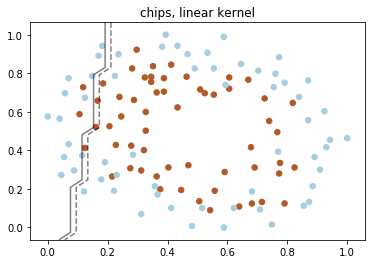

/usr/local/Cellar/ipython/7.7.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: No contour levels were found within the data range.


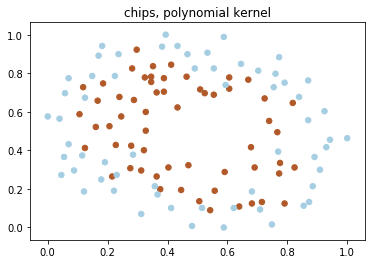

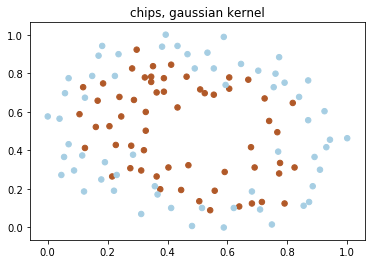

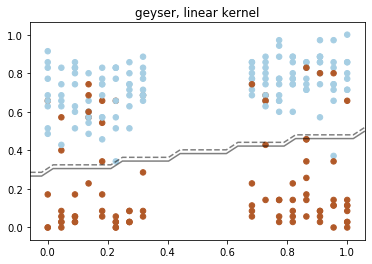

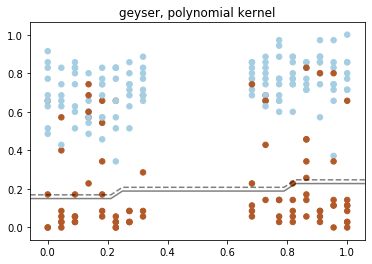

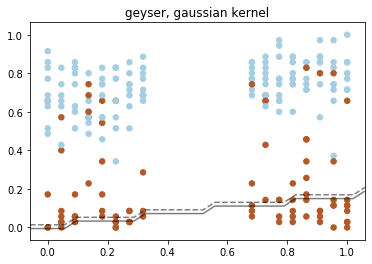

In [8]:
def plot_decision(X, y, clf, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.classify(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    plt.title(title)
    plt.show()

for path in ['chips', 'geyser']:
    X, Y = data.read_data(TEST_PATH + path + '.csv')

    classifier = core.SVM(X, Y, kermels.linear_kernel(0.7)).evaluate(C)
    plot_decision(X, Y, classifier, path + ", linear kernel")

    classifier = core.SVM(X, Y, kermels.polynomial_kernel(2)).evaluate(C)
    plot_decision(X, Y, classifier, path + ", polynomial kernel")

    classifier = core.SVM(X, Y, kermels.gaussian_kernel(3)).evaluate(C)
    plot_decision(X, Y, classifier, path + ", gaussian kernel")